<a href="https://colab.research.google.com/github/VitorGama10/Deep_Learning/blob/main/Deep_Learning_parte_1_Keras.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# LOJA DE ROUPA 

# Importando dados

In [114]:
from tensorflow import keras
import tensorflow

keras.datasets.fashion_mnist
dataset = keras.datasets.fashion_mnist
((treino_x, treino_y), (teste_x, teste_y)) = dataset.load_data()

In [115]:
len(treino_y)

60000

### Explorar os dados

In [116]:
len(treino_x) # 60.000mil imagens de roupas

60000

In [117]:
len(teste_y) #imagem de teste

10000

In [118]:
treino_x.shape #60000 linhas, 28 por 28 pixels

(60000, 28, 28)

## Observa as imagens 

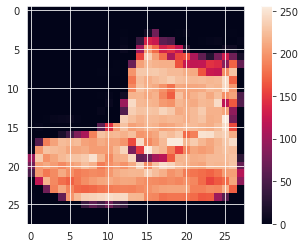

In [119]:
import matplotlib.pyplot as plt

# Importando imagem
# plt.imshow(treino_x[0]) # Pra ver a imagens
# plt.title(teste_x[0]) 

teste_x.min() # 0
teste_x.max() # o max é 9 

# Total de roupas 
totaL_de_classificação = 10

# Nomes dos objetos
nomes_de_classificadores = ['Camiseta', 'Calça', 'Pullover', 'Vestido',
                            'Casaco', 'Sandalia', 'Camisa', 'Tenis', 'Bolsa', 'Bota']

# Importando imagem
# plt.imshow(treino_x[0]) # Pra ver a imagens
# plt.title(teste_x[0]) 

'''                            
for imagem in range(10): # mostra as 10 imagens
  plt.subplot(2, 5, imagem+1)
  plt.imshow(treino_x[imagem])
  plt.title(nomes_de_classificadores[treino_y[imagem]])
'''
plt.imshow(treino_x[0])
plt.colorbar()

Criando, compilando, normalizando as imagens e treinando o modelo

usamos 3 camadas 

In [120]:
# Normalização deixa entre 0 e 1, ajuda um pouco no resultado
treino_x = treino_x / 255.0


# nosso modelo vai acontecer numa sequencia por isso usamos o Sequential
modelo = keras.Sequential([
    # entrada          # Ajatar numa dimensao só
    keras.layers.Flatten(input_shape=(28, 28)),# 28 por 28 pixels

    # Processamento 
    # Dense 256 bolinhas uma entendendo com a outra 
    keras.layers.Dense(256, activation = tensorflow.nn.relu), # relu para solucoes nao lineares
    
    # é um tipo de normalização tambem
    keras.layers.Dropout(0.3), # Ajuda quando o treino esta muito treinado, ele adormece 10% e ajuda no resultado 
     
     #saida            10 imagens 
    keras.layers.Dense(10, activation = tensorflow.nn.softmax) # softmax, vai fazer uma probabilidade dessas imagens pertecerem a uma categoria
])
               # Vai deixar o treino melhor   loss é a perda
modelo.compile(optimizer='adam', 
               loss='sparse_categorical_crossentropy', metrics = ['accuracy'])

historico = modelo.fit(treino_x, treino_y, epochs = 5, validation_split = 0.1) # vai treinar 5 vezes 
print('Nosso objetivo é diminuir a perda')

Epoch 1/5
1688/1688 [==============================] - 8s 5ms/step - loss: 0.5325 - accuracy: 0.8105 - val_loss: 0.3954 - val_accuracy: 0.8537
Epoch 2/5
1688/1688 [==============================] - 9s 5ms/step - loss: 0.4049 - accuracy: 0.8534 - val_loss: 0.3591 - val_accuracy: 0.8683
Epoch 3/5
1688/1688 [==============================] - 8s 4ms/step - loss: 0.3721 - accuracy: 0.8643 - val_loss: 0.3502 - val_accuracy: 0.8753
Epoch 4/5
1688/1688 [==============================] - 8s 5ms/step - loss: 0.3545 - accuracy: 0.8712 - val_loss: 0.3441 - val_accuracy: 0.8765
Epoch 5/5
1688/1688 [==============================] - 7s 4ms/step - loss: 0.3398 - accuracy: 0.8745 - val_loss: 0.3394 - val_accuracy: 0.8775
Nosso objetivo é diminuir a perda


# Salvando o modelo

In [126]:
from tensorflow.keras.models import load_model

modelo.save('modelo.h5')
modelo_salvo = load_model('modelo.h5')

# Ver se o modelo esta indo bem 

acuracia 

validação

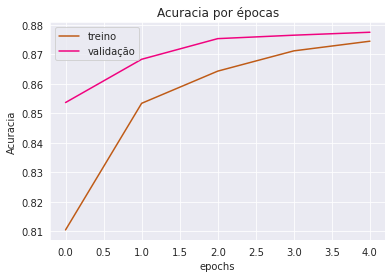

In [122]:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set_style('darkgrid')
sns.set_palette('Accent_r')

plt.plot(historico.history['accuracy'])
plt.plot(historico.history['val_accuracy'])
         
plt.title('Acuracia por épocas')
plt.xlabel('epochs')
plt.ylabel('Acuracia')
plt.legend(['treino', 'validação'])

plt = plt

## Ver a perda

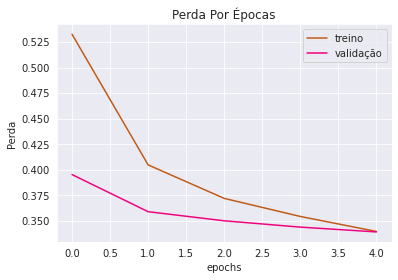

In [123]:
plt.plot(historico.history['loss'])
plt.plot(historico.history['val_loss'])
         
plt.title('Perda Por Épocas')
plt.xlabel('epochs')
plt.ylabel('Perda')
plt.legend(['treino', 'validação'])

plt = plt

# Testando o modelo

como ta se adaptando a dados novos 

predict()

vamos ver se ta prevendo bem 

In [129]:
import numpy as np
testes = modelo.predict(teste_x)
print('Resultado teste:', np.argmax(testes[0])) # podemos colocar 1 e ver se vai prever bem caso n de certo podemos ver q nossos dados n esta bem treinado
print('numero da imagem de teste:', teste_y[0])
# np.argmax --> mostra o maior argumento, maior numero 

testes_modelo_salvo = modelo_salvo.predict(teste_x)
print('resultado teste modelo salvo:', np.argmax(testes[2]))
print('numero da imagem de teste:', teste_y[2])

# Fizemos muita coisa, agora nosso modelo esta prevendo muito bem

313/313 [==============================] - 2s 5ms/step
Resultado teste: 9
numero da imagem de teste: 9
313/313 [==============================] - 1s 3ms/step
resultado teste modelo salvo: 1
numero da imagem de teste: 1


# Avaliando meu modelo 

saber quantas vezes ele errou e acertou ?
quantos ele perdeu ?

In [125]:
perda_teste, acuracia_teste = modelo.evaluate(teste_x, teste_y)
print('Perda do Teste {0:.2f}'.format(perda_teste))
print('acuracia do teste {0:.2f}'.format(acuracia_teste))

313/313 [==============================] - 1s 3ms/step - loss: 53.8610 - accuracy: 0.8592
Perda do Teste 53.86
acuracia do teste 0.86
